In [1]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
titles = []
categories = []
with open('dsjVoxArticles.tsv','r',encoding='utf-8') as tsv:
    count = 0;
    for line in tsv:
        a = line.strip().split('\t')[:3]
        if a[2] in ['Business & Finance', 'Health Care', 'Science & Health', 'Politics & Policy', 'Criminal Justice']:
            title = a[0].lower()
            title = re.sub('\s\W',' ',title)
            title = re.sub('\W\s',' ',title)
            titles.append(title)
            categories.append(a[2])

In [11]:
print("Titles-\n", "\n".join(titles[:5]))
print("\nCategories-\n", "\n".join(categories[:5]))

Titles-
 bitcoin is down 60 percent this year here's why i'm still optimistic.
9 charts that explain the history of global wealth
remember when legal marijuana was going to send crime skyrocketing?
obamacare succeeded for one simple reason it's horrible to be uninsured
the best obamacare data comes from a home office in michigan

Categories-
 Business & Finance
Business & Finance
Criminal Justice
Health Care
Health Care


In [13]:
title_tr, title_te, category_tr, category_te = train_test_split(titles,categories)
title_tr, title_de, category_tr, category_de = train_test_split(title_tr,category_tr)
print("Training: ",len(title_tr))
print("Developement: ",len(title_de),)
print("Testing: ",len(title_te))

Training:  1779
Developement:  594
Testing:  792


In [18]:
conda install -c conda-forge wordcloud=1.6.0 


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


<Figure size 432x288 with 0 Axes>

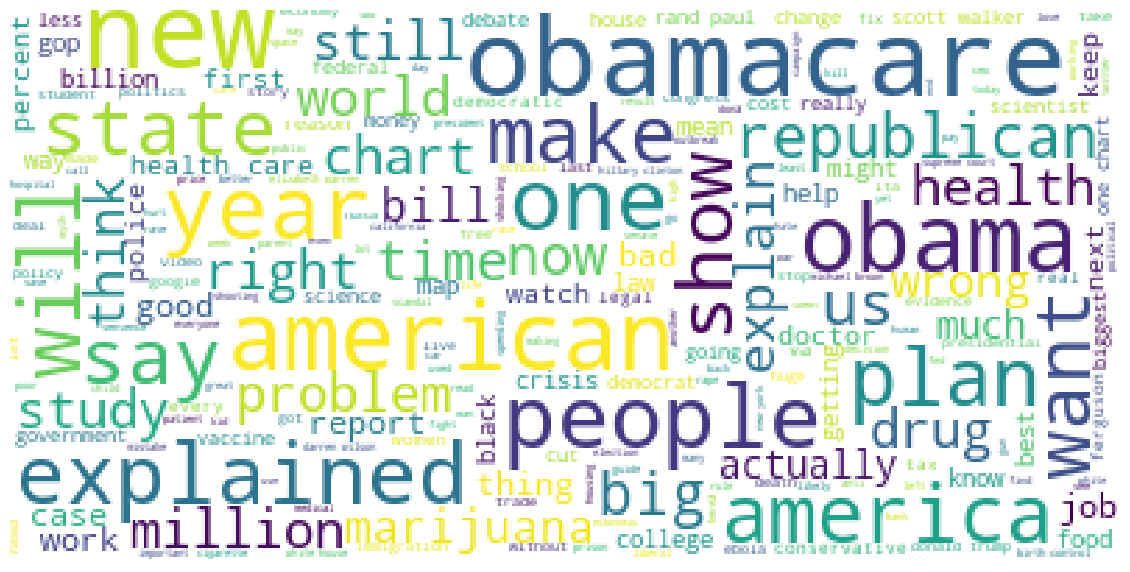

In [20]:
from wordcloud import WordCloud
text = " ".join(title_tr)
wordcloud = WordCloud().generate(text)
plt.figure()
plt.subplots(figsize=(20,12))
wordcloud = WordCloud(
    background_color="white",
    max_words=len(text),
    max_font_size=40,
    relative_scaling=.5).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [45]:
tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")
stop_words = nltk.corpus.stopwords.words("english")
vectorizer = CountVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_words)

vectorizer.fit(iter(title_tr))
Xtr = vectorizer.transform(iter(title_tr))
Xde = vectorizer.transform(iter(title_de))
Xte = vectorizer.transform(iter(title_te))

encoder = LabelEncoder()
encoder.fit(category_tr)
Ytr = encoder.transform(category_tr)
Yde = encoder.transform(category_de)
Yte = encoder.transform(category_te)

D:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [46]:
reverse_vocabulary = {}
vocabulary = vectorizer.vocabulary_
for word in vocabulary:
    index = vocabulary[word]
    reverse_vocabulary[index] = word

vector = vectorizer.transform(iter(['Nasa scientists are good']))
indexes = vector.indices
for i in indexes:
    print (reverse_vocabulary[i])

good
nasa
scientists


In [29]:
print("Number of features before reduction : ", Xtr.shape[1])
selection = VarianceThreshold(threshold=0.001)
Xtr_whole = copy.deepcopy(Xtr)
Ytr_whole = copy.deepcopy(Ytr)
selection.fit(Xtr)
Xtr = selection.transform(Xtr)
Xde = selection.transform(Xde)
Xte = selection.transform(Xte)
print("Number of features after reduction : ", Xtr.shape[1])

Number of features before reduction :  1803
Number of features after reduction :  1803


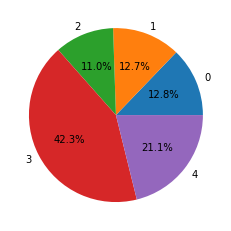

In [31]:
labels = list(set(Ytr))
counts = []
for label in labels:
    counts.append(np.count_nonzero(Ytr == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

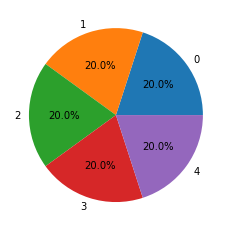

In [33]:
sm = SMOTE(random_state=42)
Xtr, Ytr = sm.fit_sample(Xtr, Ytr)
labels = list(set(Ytr))
counts = []
for label in labels:
    counts.append(np.count_nonzero(Ytr == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

In [35]:
dc = DummyClassifier(strategy="stratified")
dc.fit(Xtr, Ytr)
pred = dc.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.12      0.17      0.14        83
  Criminal Justice       0.19      0.31      0.23        75
       Health Care       0.13      0.31      0.18        49
 Politics & Policy       0.48      0.23      0.31       266
  Science & Health       0.21      0.19      0.20       121

          accuracy                           0.23       594
         macro avg       0.22      0.24      0.21       594
      weighted avg       0.31      0.23      0.24       594



In [37]:
dt = DecisionTreeClassifier()
dt.fit(Xtr, Ytr)
pred = dt.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.30      0.52      0.38        83
  Criminal Justice       0.35      0.45      0.40        75
       Health Care       0.45      0.61      0.52        49
 Politics & Policy       0.71      0.47      0.56       266
  Science & Health       0.50      0.46      0.48       121

          accuracy                           0.48       594
         macro avg       0.46      0.50      0.47       594
      weighted avg       0.54      0.48      0.50       594



In [39]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(Xtr, Ytr)
pred = rf.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.30      0.43      0.35        83
  Criminal Justice       0.42      0.56      0.48        75
       Health Care       0.47      0.69      0.56        49
 Politics & Policy       0.72      0.51      0.60       266
  Science & Health       0.50      0.47      0.49       121

          accuracy                           0.51       594
         macro avg       0.48      0.53      0.50       594
      weighted avg       0.56      0.51      0.52       594



In [40]:
nb = MultinomialNB()
nb.fit(Xtr, Ytr)
pred = nb.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.51      0.53      0.52        83
  Criminal Justice       0.66      0.60      0.63        75
       Health Care       0.54      0.69      0.61        49
 Politics & Policy       0.75      0.69      0.72       266
  Science & Health       0.65      0.70      0.67       121

          accuracy                           0.66       594
         macro avg       0.62      0.64      0.63       594
      weighted avg       0.67      0.66      0.66       594



In [41]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(Xtr, Ytr)
pred = svc.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.32      0.24      0.27        83
  Criminal Justice       0.81      0.29      0.43        75
       Health Care       0.76      0.33      0.46        49
 Politics & Policy       0.57      0.86      0.68       266
  Science & Health       0.58      0.37      0.45       121

          accuracy                           0.56       594
         macro avg       0.61      0.42      0.46       594
      weighted avg       0.58      0.56      0.53       594



In [42]:
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 20), random_state=1, max_iter=400)
mlp.fit(Xtr, Ytr)
pred = mlp.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

Business & Finance       0.54      0.46      0.50        83
  Criminal Justice       0.53      0.43      0.47        75
       Health Care       0.39      0.55      0.45        49
 Politics & Policy       0.72      0.70      0.71       266
  Science & Health       0.56      0.63      0.59       121

          accuracy                           0.60       594
         macro avg       0.55      0.55      0.55       594
      weighted avg       0.61      0.60      0.60       594



                    precision    recall  f1-score   support

Business & Finance       0.50      0.54      0.51       114
  Criminal Justice       0.55      0.62      0.58       107
       Health Care       0.50      0.59      0.54        81
 Politics & Policy       0.73      0.62      0.67       340
  Science & Health       0.66      0.71      0.69       150

          accuracy                           0.62       792
         macro avg       0.59      0.62      0.60       792
      weighted avg       0.63      0.62      0.63       792



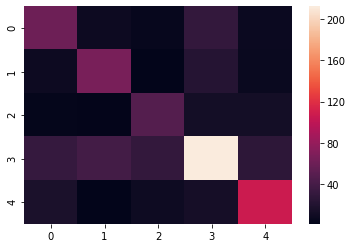

In [43]:
pred = nb.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))
sns.heatmap(confusion_matrix(Yte, pred))

In [44]:
nb1 = MultinomialNB()
nb1.fit(Xtr_whole, Ytr_whole)
coefs = nb1.coef_
target_names = encoder.classes_

for i in range(len(target_names)):
    words = []
    for j in coefs[i].argsort()[-20:]:
        words.append(reverse_vocabulary[j])
    print (target_names[i], '-', words, "\n")

Business & Finance - ['denies', 'angry', 'changes', 'gotten', 'announcing', 'affected', '7', 'adults', 'australian', 'earth', 'detox', 'blackwater', 'atlantic', 'disability', 'doesnâ', 'ceremony', 'backs', 'bring', 'harder', 'head'] 

Criminal Justice - ['employee', '6s', 'embarrassed', 'consultants', 'guam', 'atlantic', 'bilk', 'disability', 'head', 'affects', 'detox', 'awesome', 'doesnâ', 'deeply', 'hampshire', 'bring', 'alcohol', 'deal', 'driver', 'busts'] 

Health Care - ['decline', 'fix', 'advisers', 'convince', 'believe', 'head', 'gone', 'askâ', 'detox', '70', '6s', 'declared', 'doesnâ', 'affect', 'atlantic', 'disability', 'american', 'grade', 'christie', 'dieâ'] 

Politics & Policy - ['empire', 'doctors', 'genetically', 'exoplanet', 'epidemic', '6s', 'bring', 'bad', 'epic', 'adults', 'doesnâ', 'ceres', 'e', 'dozen', 'coal', 'detox', 'disability', 'head', 'dieâ', 'diets'] 

Science & Health - ['animated', 'drink', 'finally', 'hasnâ', 'harry', 'bring', 'bernanke', 'felonies', 'doe